In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df0 = pd.read_csv('moving-closerfarcloser.csv')
%matplotlib inline
df0.head(), df0.shape

(   date_index  rsrp  rsrq  wbcqi  macStats_phr  dlCqiReport_sfnSn  \
 0        6532   -83    -2     15            40              12631   
 1        6531   -83    -2     15            40              12551   
 2        6530   -83    -2     15            40              12471   
 3        6529   -83    -2     15            40              12311   
 4        6528   -83    -2     15            40              12231   
 
    macStats_totalBytesSdusDl  macStats_totalTbsUl  macStats_mcs1Ul  \
 0                       8376               859211               10   
 1                       8376               859022               10   
 2                       8376               858959               10   
 3                       8376               858707               10   
 4                       8374               858581               10   
 
    macStats_totalPduDl  ...  pdcpStats_pktTxBytes  pdcpStats_pktRxAiat  \
 0                 1534  ...                 25609              1226166   


Remove columns with single value

In [2]:
df1 = df0
for col in df1.columns:
    if len(df1[col].unique()) == 1:
        df1 = df1.drop(col,axis=1)

df1.shape

(6532, 37)

In [3]:
df1.head()

,date_index,rsrp,rsrq,wbcqi,macStats_phr,dlCqiReport_sfnSn,macStats_totalBytesSdusDl,macStats_totalTbsUl,macStats_mcs1Ul,macStats_totalPduDl,...,pdcpStats_pktTxBytesW,pdcpStats_pktTxSn,pdcpStats_pktTxBytes,pdcpStats_pktRxAiat,pdcpStats_pktRxBytes,pdcpStats_pktTx,pdcpStats_pktTxW,pdcpStats_pktTxAiatW,pdcpStats_sfn,pdcpStats_pktTxAiat
0,6532,-83,-2,15,40,12631,8376,859211,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246934,1223769
1,6531,-83,-2,15,40,12551,8376,859022,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246884,1223769
2,6530,-83,-2,15,40,12471,8376,858959,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246834,1223769
3,6529,-83,-2,15,40,12311,8376,858707,10,1534,...,0,13,25609,1226166,64624,71,0,0,1246734,1223769
4,6528,-83,-2,15,40,12231,8374,858581,10,1533,...,0,13,25609,1226166,64624,71,0,0,1246684,1223769


Remove columns that have null values

In [17]:
df2=df1.dropna()
df2.shape, df2.columns.tolist()

((6532, 37),
 ['date_index',
  'rsrp',
  'rsrq',
  'wbcqi',
  'macStats_phr',
  'dlCqiReport_sfnSn',
  'macStats_totalBytesSdusDl',
  'macStats_totalTbsUl',
  'macStats_mcs1Ul',
  'macStats_totalPduDl',
  'macStats_totalBytesSdusUl',
  'macStats_tbsDl',
  'macStats_totalPrbUl',
  'macStats_macSdusDl_sduLength',
  'macStats_macSdusDl_lcid',
  'macStats_totalPduUl',
  'macStats_mcs1Dl',
  'macStats_mcs2Dl',
  'macStats_prbDl',
  'macStats_totalPrbDl',
  'macStats_totalTbsDl',
  'ulCqiReport_sfnSn',
  'pdcpStats_pktRx',
  'pdcpStats_pktRxW',
  'pdcpStats_pktRxAiatW',
  'pdcpStats_pktRxBytesW',
  'pdcpStats_pktRxSn',
  'pdcpStats_pktTxBytesW',
  'pdcpStats_pktTxSn',
  'pdcpStats_pktTxBytes',
  'pdcpStats_pktRxAiat',
  'pdcpStats_pktRxBytes',
  'pdcpStats_pktTx',
  'pdcpStats_pktTxW',
  'pdcpStats_pktTxAiatW',
  'pdcpStats_sfn',
  'pdcpStats_pktTxAiat'])

In [22]:
data=df2[['date_index','rsrp','rsrq','wbcqi','dlCqiReport_sfnSn','macStats_mcs1Dl','macStats_mcs2Dl',]]
data.head()

,date_index,rsrp,rsrq,wbcqi,dlCqiReport_sfnSn,macStats_mcs1Dl,macStats_mcs2Dl
0,6532,-83,-2,15,12631,28,0
1,6531,-83,-2,15,12551,28,0
2,6530,-83,-2,15,12471,28,0
3,6529,-83,-2,15,12311,28,0
4,6528,-83,-2,15,12231,28,0


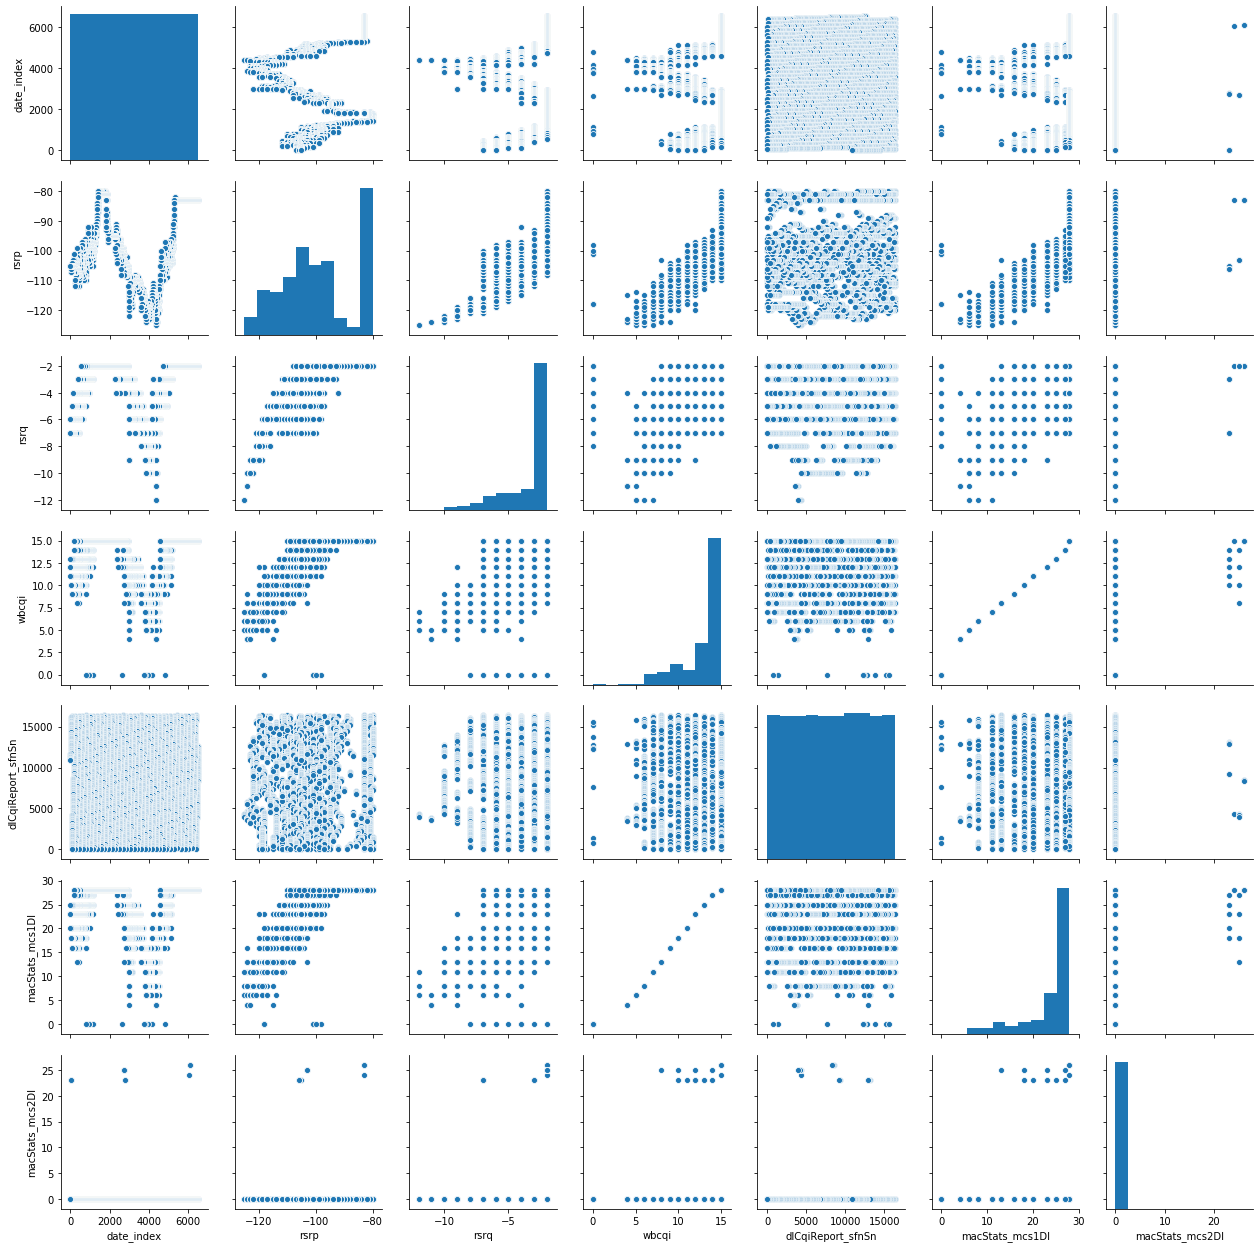

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data,palette='rainbow')

#fig, axes = plt.subplots()
#axes.plot(df2['dlCqiReport_sfnSn'],df2['wbcqi'], 'r')
#axes.set_ylabel('wbcqi')
#axes.set_xlabel('dlCqiReport_sfnSn')
#axes.set_title('title');

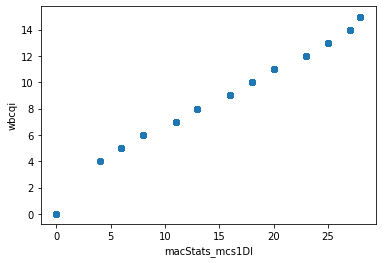

In [25]:
plt.scatter(df2['macStats_mcs1Dl'],df2['wbcqi'], alpha=0.7)
plt.xlabel('macStats_mcs1Dl')
plt.ylabel('wbcqi')
plt.show()

because of direct correlation between 'macStats_mcs1Dl','wbcqi', we keep only one of them:'macStats_mcs1Dl' 

In [26]:
data=df2[['date_index','rsrp','rsrq','dlCqiReport_sfnSn','macStats_mcs1Dl','macStats_mcs2Dl']]

Now the goal is to make a model that can predict 'macStats_mcs1Dl' based on remaining features ['date_index','rsrp','rsrq','dlCqiReport_sfnSn','macStats_mcs2Dl']